In [1]:
import sys
sys.path.append('/home/mehdi/github/FFTLog-and-beyond/python')

In [6]:
import numpy as np
from fftlog import fftlog, hankel

import matplotlib.pyplot as plt

In [3]:
print('This is a test of fftlog module written by Xiao Fang.')
print('nu is required to be between -ell to 2.')
k, pk = np.loadtxt('../Pk_test', usecols=(0,1), unpack=True)
N = k.size
print('number of input data points: '+str(N))
ell = 1
nu = 1.01
myfft = fftlog(k, pk, nu=nu, N_extrap_low=1500, N_extrap_high=1500, c_window_width=0.25, N_pad=5000)
r, Fr = myfft.fftlog(ell)

This is a test of fftlog module written by Xiao Fang.
nu is required to be between -ell to 2.
number of input data points: 3000


Testing fftlog


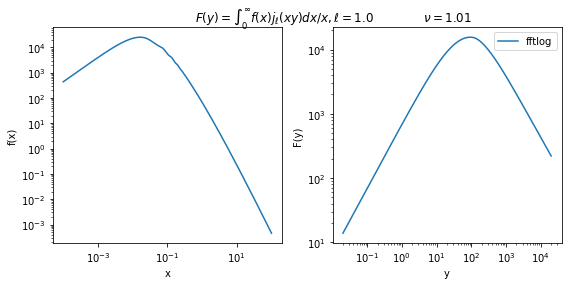

In [4]:
print('Testing fftlog')
fig = plt.figure(figsize=(8,4))
fig.suptitle(r'$F(y) = \int_0^\infty f(x)j_{\ell}(xy) dx/x, \ell=$%.1f'%(ell))

subfig1 = fig.add_subplot(1,2,1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('f(x)')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1,2,2)
subfig2.set_title(r'$\nu=$%.2f'%(nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('F(y)')
subfig2.plot(r, Fr, label='fftlog')

# r_c, Fr_c = np.loadtxt('../cfftlog/test_output.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_c, Fr_c, label='(bad) brute-force')

# r_bf, Fr_bf = np.loadtxt('test_bruteforce.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_bf, Fr_bf)
plt.legend()
plt.tight_layout()
plt.show()

Testing 1st & 2nd-derivative


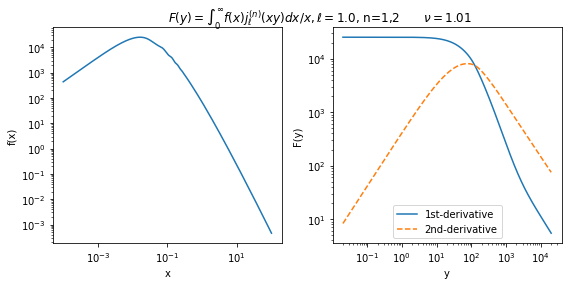

In [9]:
print('Testing 1st & 2nd-derivative')

r1, Fr1 = myfftlog.fftlog_dj(ell)
r2, Fr2 = myfftlog.fftlog_ddj(ell)
fig = plt.figure(figsize=(8,4))
fig.suptitle(r'$F(y) = \int_0^\infty f(x)j_{\ell}^{(n)}(xy) dx/x, \ell=$%.1f, n=1,2'%(ell))

subfig1 = fig.add_subplot(1,2,1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('f(x)')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1,2,2)
subfig2.set_title(r'$\nu=$%.2f'%(nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('F(y)')
subfig2.plot(r1, abs(Fr1), label="1st-derivative")
subfig2.plot(r2, abs(Fr2), '--', label='2nd-derivative')
# r_bf, Fr_bf = np.loadtxt('test_bruteforce.txt', usecols=(0,1), unpack=True)
# subfig2.plot(r_bf, Fr_bf)
plt.legend()
plt.tight_layout()
plt.show()

Testing hankel
nu is required to be between (0.5-n) and 2.


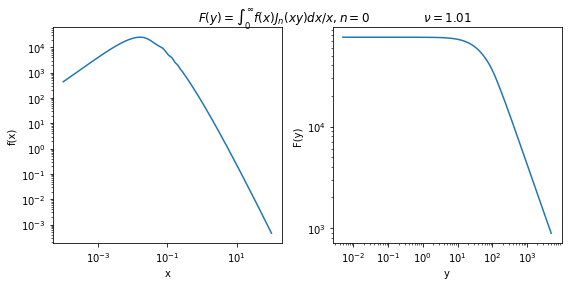

In [7]:
print('Testing hankel')

n = 0
nu = 1.01
myhankel = hankel(k, pk, nu=nu, N_extrap_low=1500, N_extrap_high=1500, c_window_width=0.25)
r, Fr = myhankel.hankel(n)

fig = plt.figure(figsize=(8,4))
fig.suptitle(r'$F(y) = \int_0^\infty f(x)J_{n}(xy) dx/x, n=$%d'%(n))

subfig1 = fig.add_subplot(1,2,1)
subfig1.set_xscale('log')
subfig1.set_yscale('log')
subfig1.set_xlabel('x')
subfig1.set_ylabel('f(x)')
subfig1.plot(k, pk)
plt.tight_layout()

subfig2 = fig.add_subplot(1,2,2)
subfig2.set_title(r'$\nu=$%.2f'%(nu))
subfig2.set_xscale('log')
subfig2.set_yscale('log')
subfig2.set_xlabel('y')
subfig2.set_ylabel('F(y)')
subfig2.plot(r, Fr)
plt.tight_layout()
plt.show()